In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import warnings
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


## Data Gathering

#### Imorting Enhanced Twitter Archive


In [2]:
twitter_arch = pd.read_csv ('twitter-archive-enhanced (2).csv')



#### Downloading the tweet image predictions 

In [9]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response 

 

<Response [200]>

In [10]:
T_images = url.split('/')[-1]


with open(os.path.join('./', T_images), mode = 'wb') as file:
    file.write(response.content)

In [11]:
df_predictions = pd.read_csv(T_images, sep = '\\t', engine='python')


###  Getting Tweet Data From Twitter API

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '######'
consumer_secret = '#######'
access_token = '########'
access_secret = '###########'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API


tweet_ids = twitter_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [14]:
pd.read_json("1tweet_json.txt", lines = True,dtype ={"id_str": str})[:-1]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,2015-11-16 00:30:50+00:00,666050758794694657,666050758794694657,This is a truly beautiful English Wilson Staff...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,136,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
import json
lists = []
with open('1tweet_json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        column =  {'tweet_id':tweets['id'] ,
                'favorite_counts': tweets['favorite_count'],
                'retweet_counts':tweets['retweet_count']}
        lists.append(column)
df = pd.DataFrame(lists)
df

,tweet_id,favorite_counts,retweet_counts
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


saving the data frame to a csv file 

In [16]:




df.to_csv('tweet_data.csv', index=False)



checking the file was saved correctly

In [17]:
x = pd.read_csv('tweet_data.csv')
x.head ()

,tweet_id,favorite_counts,retweet_counts
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774



# 3 assessing data

### A. Assessing enhanced twitter archive data
        

In [14]:
twitter_arch.head ()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
twitter_arch.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
twitter_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [22]:
twitter_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1256,710588934686908417,NaN,NaN,2016-03-17 22:09:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beemo. He's a Chubberflop mix. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710588934...,12,10,Beemo,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594477e+17,4.196984e+09,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
2044,671533943490011136,NaN,NaN,2015-12-01 03:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog here. Spiffy mohawk. Sharp mout...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671533943...,6,10,None,None,None,None,None
1522,690649993829576704,NaN,NaN,2016-01-22 21:39:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,None,None,None,None
2131,670086499208155136,NaN,NaN,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670086499...,10,10,None,None,None,None,None
1260,710269109699739648,NaN,NaN,2016-03-17 00:58:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The squad is back for St. Patrick's Day! ☘ 💚\n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710269109...,13,10,None,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10,10,None,None,None,None,None


In [23]:
twitter_arch.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

 checking which ID's have numerator with less than 10

In [24]:


twitter_arch[twitter_arch.rating_numerator <10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

checking rating numerator of tweet_id 666049248165822465

In [25]:


twitter_arch.loc[twitter_arch.tweet_id == 666049248165822465, 'rating_numerator']

2351    5
Name: rating_numerator, dtype: int64

checking text of  tweet_id 666049248165822465 using row number 

In [26]:


twitter_arch.loc[2351, 'text']

'Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq'

In [27]:
twitter_arch.name.value_counts ()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

## B.Assesing the tweet image prediction

In [16]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,Shetland_sheepdog,0.071124,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
1692,815990720817401858,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,1,Chihuahua,0.428756,True,miniature_pinscher,0.103912,True,Staffordshire_bullterrier,0.088959,True
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
302,671504605491109889,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,0.259115,True,bath_towel,0.177669,False,Maltese_dog,0.071712,True
1781,828708714936930305,https://pbs.twimg.com/media/C4AqLSgVYAEg8nt.jpg,1,hippopotamus,0.942911,False,Mexican_hairless,0.008388,True,ice_lolly,0.006206,False
1630,805487436403003392,https://pbs.twimg.com/media/Cy2qiTxXcAAtQBH.jpg,3,shield,0.587830,False,barrel,0.090180,False,sundial,0.069199,False
1848,839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,Norwich_terrier,0.052480,True,Pembroke,0.049901,True
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True


In [31]:
df_predictions.iloc[2]

tweet_id                                 666033412701032449
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num                                                   1
p1                                          German_shepherd
p1_conf                                            0.596461
p1_dog                                                 True
p2                                                 malinois
p2_conf                                            0.138584
p2_dog                                                 True
p3                                               bloodhound
p3_conf                                            0.116197
p3_dog                                                 True
Name: 2, dtype: object

### C.Asessing tweet data From tweitter API

In [17]:
df.head()

,tweet_id,favorite_counts,retweet_counts
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [33]:
df.sample(10)

,tweet_id,favorite_counts,retweet_counts
759,778383385161035776,6515,1271
463,817415592588222464,6267,1131
2165,669359674819481600,390,134
1194,717047459982213120,6826,2135
532,807621403335917568,16236,4288
960,750868782890057730,5306,1595
1811,676776431406465024,5405,2249
1027,745712589599014916,7652,2636
1400,699423671849451520,1505,383
1872,675135153782571009,1398,542


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favorite_counts  2354 non-null   int64
 2   retweet_counts   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues

##### Twitter enhanced :

       
1. Columns ('doggo', 'floofer', 'pupper','puppo') has 'None' for missing value


2. source column is html tag "<'a'>' we can extract the source of the tweet and convert it to categorical


3. There are 181 retweets as indicated by retweeted_status_id

 
4. 'timestamp' column is 'str' instead of 'datetime'


5. Invalid tweet_id data type (integer instead of string) 


6. Some dog name are incorrect.


#### Twitter prediction


7. Missing photos for some IDs


8. underscore are used in multi_word names in column p1 p2 and p3 instead of spece and Some P names start with un uppercase letter while others start with lowercase




### Tidiness issues

1. In twitter_arch 'doggo', 'floofer', 'pupper','puppo'columns are all about same thing a kind of dogs personality 


2. all dataset should be combined into 1 dataset only




## Cleaning Data

#### A. creating dataframe copies

In [18]:
clean_twitter_arch = twitter_arch.copy ()
clean_df_predictions = df_predictions.copy ()
clean_df = df.copy ()

### Issue #1: 

#### Columns ('doggo', 'floofer', 'pupper','puppo') has 'None' for missing value

#### Define: 

Replace 'None' with np.nan for columns ('doggo', 'floofer', 'pupper','puppo')

#### Code 

In [19]:
col_list = ['doggo', 'floofer', 'pupper','puppo']

for col in col_list:

    clean_twitter_arch[col] = clean_twitter_arch[col].replace('none', np.nan)

#### Test

In [37]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2:

#### source column is html tag "<'a'>' we can extract the source of the tweet and convert it to categorical

#### Define

extract tweet from source column using apply meth in pandas and convert it to categorical


#### Code

check for the unique value 



In [38]:
clean_twitter_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

make a function fix_source which extract the strings between tags

'x' is an html string from the source column in clean_twitter_arch dataset

find the first closed tag >

find the first open tag after the previous <

extract the text in between

In [39]:
def fix_source(x):
    
    A=x.find('>') + 1 
    B =x[A:].find('<')
    
    return x[A:][:B]

clean_twitter_arch.source = clean_twitter_arch.source.apply(lambda x: fix_source(x)).astype('category')

### Test

Check for the unique values



In [40]:
clean_twitter_arch.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

### Issue3

#### There are 181 retweets as indicated by retweeted_status_id

#### Define 

Delete rows that represent retweets and all related columns






#### Code

Keep only original tweets that have no retweet status id

In [41]:
clean_twitter_arch = clean_twitter_arch[clean_twitter_arch.retweeted_status_id.isna()]

clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2175 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2175 non-null   object  
 4   source                      2175 non-null   category
 5   text                        2175 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               2117 non-null   object  
 10  rating_numerator            2175 non-null   int64   
 11  rating_denominator          2175 non-null   int64   
 12  name                        2175 non-null   object  
 13  doggo             

Delete related columns

In [42]:
clean_twitter_arch = clean_twitter_arch.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'])

#### Test

In [43]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               2175 non-null   int64   
 1   in_reply_to_status_id  78 non-null     float64 
 2   in_reply_to_user_id    78 non-null     float64 
 3   timestamp              2175 non-null   object  
 4   source                 2175 non-null   category
 5   text                   2175 non-null   object  
 6   expanded_urls          2117 non-null   object  
 7   rating_numerator       2175 non-null   int64   
 8   rating_denominator     2175 non-null   int64   
 9   name                   2175 non-null   object  
 10  doggo                  2175 non-null   object  
 11  floofer                2175 non-null   object  
 12  pupper                 2175 non-null   object  
 13  puppo                  2175 non-null   object  
dtypes: category(1), float64(2), int64(3), ob

### Issue4

#### 'timestamp' column is 'str' instead of 'datetime'

#### define 

Correct invalid data type by converting timestamp to date time 

#### Code

In [46]:
clean_twitter_arch.timestamp = pd.to_datetime(clean_twitter_arch.timestamp)

#### Test

In [47]:
clean_twitter_arch.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   category           
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

#### Test

In [ ]:
clean_twitter_arch.info()

## Issue 5

#### Invalid tweet_id data type (integer instead of string)

#### DEFINE

##### convert invalid data type by converting tweet_id to string 


#### code 

In [51]:
clean_twitter_arch.tweet_id = clean_twitter_arch.tweet_id.astype(str)

#### Test

In [69]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### Issue 6

#### Some dog name are incorrect.

### Define

Change the frequent incorrect dog name to None

### Code

In [6]:
clean_twitter_arch['name'].value_counts().head(10)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Name: name, dtype: int64

In [7]:

not_name_list = ['a','the','an']
for i in not_name_list:
        clean_twitter_arch['name'].replace(i, 'None', inplace=True)

### Test

In [8]:
clean_twitter_arch['name'].value_counts().head(10)

None       815
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Name: name, dtype: int64

### Issue 7

#### Missing photos for some IDs (2075 rows instead of 2356)

#### Define

delete rows with missing photos 

#### code

In [21]:
clean_df_predictions = clean_df_predictions[clean_df_predictions.jpg_url.notnull()]

In [48]:
clean_df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


### Issue 8

#### Some P names start with un uppercase letter while others start with lowercase

#### Define 

convert lowercase letters to uppercase


#### Code

In [23]:
clean_df_predictions.p1 = clean_df_predictions.p1.str.title()
clean_df_predictions.p2 = clean_df_predictions.p2.str.title()
clean_df_predictions.p3 = clean_df_predictions.p3.str.title()


#### Test

In [41]:
clean_df_predictions.p1.sample(10)

1974                          Pembroke
1101                         Chihuahua
916                      Border_Collie
1352                Labrador_Retriever
246                               Wool
158                              Teddy
1582    American_Staffordshire_Terrier
212                                Pot
607                            Samoyed
1356                           Samoyed
Name: p1, dtype: object

In [42]:
clean_df_predictions.p2.sample(10)

2003          Cardigan
656         Eskimo_Dog
1341            Vizsla
1988    French_Bulldog
1070     Silky_Terrier
506           Malinois
291             Kelpie
1112            Collie
655         Loggerhead
233           Cardigan
Name: p2, dtype: object

In [43]:
clean_df_predictions.p3.sample(10)

490           Siberian_Husky
728       Australian_Terrier
1813         Tibetan_Mastiff
1096       Italian_Greyhound
1280            Croquet_Ball
172                  Basenji
91                 Chihuahua
289       Scottish_Deerhound
471                Microwave
924     Old_English_Sheepdog
Name: p3, dtype: object

#### underscore are used in multi_word names in column p1 p2 and p3 instead of spece 

#### Define

Replace _ and - with white space in p1 , p2 and p3 column

#### Code

In [49]:
clean_df_predictions.p1= clean_df_predictions.p1.str.replace('_',' ')
clean_df_predictions.p2= clean_df_predictions.p2.str.replace('_',' ')
clean_df_predictions.p3= clean_df_predictions.p3.str.replace('_',' ')

clean_df_predictions.p1= clean_df_predictions.p1.str.replace('-',' ')
clean_df_predictions.p2= clean_df_predictions.p2.str.replace('-',' ')
clean_df_predictions.p3= clean_df_predictions.p3.str.replace('-',' ')

#### Test

In [50]:
clean_df_predictions.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft Coated Wheaten Terrier,0.082086,True


### cleaning Tidiness 

#### T1    In twitter_arch 'doggo', 'floofer', 'pupper','puppo'columns are all about same thing a kind of dogs personality

#### Define

Merge the 4 column into 1 called dog_stage 

#### Code

In [16]:
#extract dog stage from text column into the new dog stage column

clean_twitter_arch['dog_stage'] = clean_twitter_arch['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


### Test

drop unrequired column

In [17]:
clean_twitter_arch = clean_twitter_arch.drop(columns=['doggo','floofer','pupper','puppo'])

In [18]:

clean_twitter_arch.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

### T2 all dataset should be combined into 1 dataset only

#### Define

Merge all data frames into 1 based on tweet_id

#### Code 

In [21]:
clean_twitter_arch = pd.merge(clean_twitter_arch, clean_df, on ='tweet_id', how='left' )



clean_twitter_arch = pd.merge(clean_twitter_arch, clean_df_predictions, on = 'tweet_id',how='left' )

#### Test

In [22]:
clean_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### Storing Data

In [23]:
clean_twitter_arch.to_csv('twitter_archive_master.csv')

### Analyzing and Visualizing Data

#### Let's compare dog stage 


In [25]:
stage1_df = clean_twitter_arch.dog_stage.value_counts()
stage1_df

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

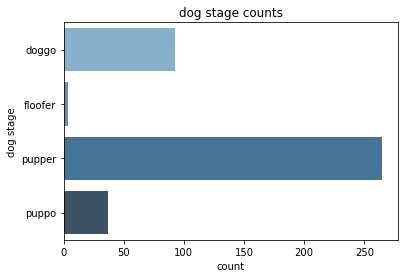

In [46]:
data = clean_twitter_arch.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='count' , ylabel='dog stage' , title='dog stage counts')
plt.show()

#### Insight

As we can see the most common stage is pupper 

#### the percentage of different dog stage 

Creating a pie chart

(-1.1688700701851218,
 1.41740938618791,
 -1.3407043845000202,
 1.2036616490098864)

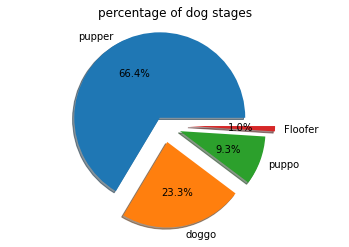

In [51]:
plt.pie(stage_df,
labels = ['pupper', 'doggo', 'puppo', 'Floofer'],
autopct = '%1.1f%%',
shadow=True,
explode=(0.1, 0.2, 0.2, 0.3)
)
plt.title('percentage of dog stages')
plt.axis('equal')

#### Insights

1. Pupper ha sthe highest percentage 
2. floofer ha sthe lowest percentage 

### Relationship between retweet counts and favorite counts

Text(0, 0.5, 'Favorite count')

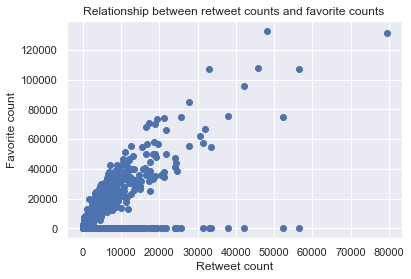

In [69]:
plt.scatter(clean_twitter_arch.retweet_counts,  clean_twitter_arch.favorite_counts)
plt.title('Relationship between retweet counts and favorite counts ')
plt.xlabel('Retweet count')
plt.ylabel('Favorite count')

Text(0, 0.5, 'Favorite count')

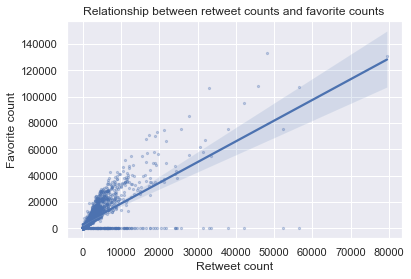

In [76]:

ax = sns.regplot(x='retweet_counts' , y='favorite_counts', data=clean_twitter_arch, color='b' , scatter_kws={'s':5, 'alpha':.3})
plt.title('Relationship between retweet counts and favorite counts ')
plt.xlabel('Retweet count')
plt.ylabel('Favorite count')

#### Insight as we expected the favorite and retweets are highly postive correlated 

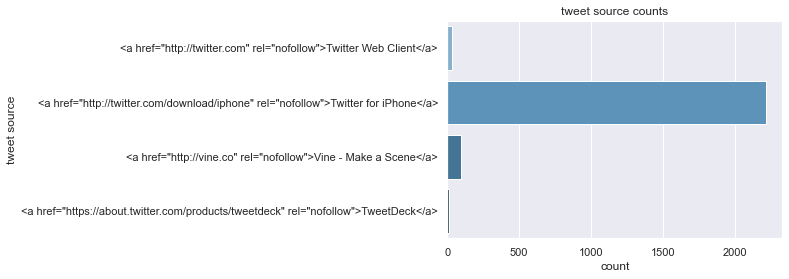

In [73]:
data = clean_twitter_arch.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='count',ylabel='tweet source', title='tweet source counts')
plt.show()

#### Insight As we can see the most tweet source is From Iphone 


### Resources 

1. https://stackoverflow.com/questions/49590874/dataframe-object-has-no-attribute-isna
2. https://www.youtube.com/watch?v=QMOwEOOMweg
3. https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
4. https://stackoverflow.com/questions/55506571/python-nameerror-name-engine-is-not-defined-driver-not-found